<h1> HUB4045F Assignment 4: 30% of final mark </h1>

Due date: 12 May 2019 @ 23h59.


### Instructions :
- Solutions to be submitted as a jupyter notebook called "__HUB4045F - Yourname - Your student number - Assignment 4__". 
- Explanations to questions should be done in formatted markdown cells. Code should be presented in code cells. 
- All required libraries for your code to run should be clearly stated at the beginning of the notebook with full instructions of how to install them.
- All code should be well commented.
- Part marks will be given for non running code provided that an explanation is provided for why the code is not working.
- Add appropriate references to other peoples work or code. 
- All data should references using relative paths and ofocurse you will need to upload them with your python file when submitting.

- NB: We will submit the code for similarity tests (http://www.tareeinternet.com/scripts/comparison-tool/). As much as we encourage sharing ideas and working together its important that the final submission be inidvidual work

### Question 1 [10 marks]: Segmentation

Load dicom image provided {'CTimage.dcm'}. It is a crosss-sectional image slice from a CT volume which is taken around the mid femur region. It is common necessity to demarcate specific regions in such cross-sections in order to facilitate downstream quantification of anatomies (e.g. areas, moment inertia's)

a) Display the image

b) Isolate the leg on the left (white)

c) Segment and label the bone (yellow)

d) segment and label the muscles (red)

As a guide the images below describe what is expected. (Note that the demarcated regions in the image may not necessarily be accurate, it is only meant to serve as a guide)

<center><img src="./CTdata.png"></center> 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


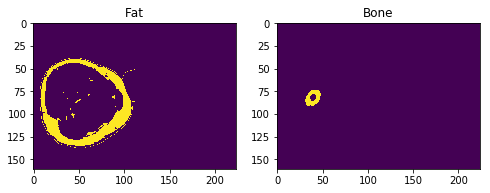

In [98]:
import numpy as np
import cv2
import pydicom as DCM
from matplotlib import pyplot as plt

CTImage = DCM.read_file('./CTimage.dcm')
CTPix = CTImage.pixel_array


import skimage.color as ski

grayimage = ski.rgb2gray(CTPix)
#plt.imshow(grayimage, cmap = 'gray')
#plt.title('1 channel image');
grayimage2 = grayimage

x = 36063

for n,val in enumerate(grayimage.flat):
    if((n%224)>112):
        grayimage2.flat[n] = 0
        
colImage = ski.gray2rgb(grayimage2)

#for n,val in enumerate(grayimage.flat):
#    print(val)

fat = (grayimage2 > -300) & (grayimage2 < -80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.imshow(colImage);
ax2.imshow(colImage);
fat = (grayimage > -300) & (grayimage < -80)
bone = (grayimage > 500)
ax1.imshow(fat);
ax2.imshow(bone);
ax1.set_title("Fat");
ax2.set_title('Bone');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


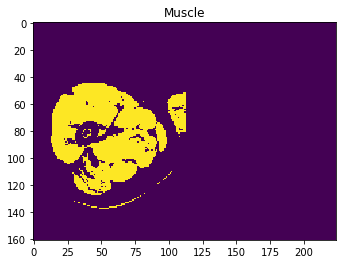

In [95]:
plt.imshow(colImage);
muscle = (grayimage > 0) & (grayimage < 200)
plt.imshow(muscle);
plt.title('Muscle');

The two cells above show the segmentation of the left leg into fat, muscle and bone.

### Question 2 [10 marks]: Feature calculation

After segmenting the image into the necessary labelled regions, calculate the following metrics - 

a) Total area of the bone

b) Cortical area of the bone (i.e. only the high intensity region, ignoring the medullary region)

c) Total muscle area

In [65]:
CTImagei = pydicom.dcmread('CTimage.dcm')
print(CTImagei)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: 'DERIVED/SECONDARY'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.45.45.2.51.4.93328250502379.20180511.160515003
(0008, 0020) Study Date                          DA: '20180511'
(0008, 0021) Series Date                         DA: '20180511'
(0008, 0023) Content Date                        DA: '20180511'
(0008, 0030) Study Time                          TM: '150457'
(0008, 0031) Series Time                         TM: '150515'
(0008, 0033) Content Time                        TM: '150515'
(0008, 0050) Accession Number                    SH: '1'
(0008, 0060) Modality                            CS: 'OT'
(0008, 0064) Conversion Type                     CS: 'SYN'
(0008, 0090) Referring Physician's Name          PN: "unknown referring physician's name"
(0008, 1030) Study Descr


Total medulla area is  220  pixels squared
Total Cortical area of the bone is  373  pixels squared
Total muscle area is  26266  pixels squared
Pixel is 0.187733 x 0.187734 cm

Total medulla area is  7.753650744840001  mm squared
Total Cortical area of the bone is  13.145962399206002  mm squared
Total muscle area is  925.7154111998522  mm squared


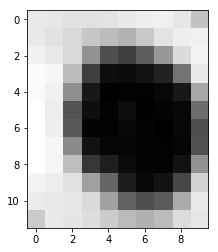

In [11]:
import numpy as np
import cv2
import pydicom as DCM
from matplotlib import pyplot as plt

CTImage = DCM.read_file('./CTimage.dcm')
CTPix = CTImage.pixel_array


import skimage.color as ski

grayimage = ski.rgb2gray(CTPix)

medulla1 = CTPix[77:87,35:45];
medulla2 = CTPix[78:90,180:190];
medulla1 = ski.rgb2gray(medulla1);
medulla2 = ski.rgb2gray(medulla2);

s1=0;
s2=0;
s3=0;
boneM = (grayimage > 500)



plt.imshow(medulla2, 'gray');
print()
m1 =np.count_nonzero(medulla1)
m2 = np.count_nonzero(medulla2)
m1 =  m1+m2
print("Total medulla area is ",m1, " pixels squared");
for n,val in enumerate(grayimage.flat):
    if(val>500):
        s1=s1+1

print("Total Cortical area of the bone is ",s1," pixels squared");

for n,val in enumerate(grayimage.flat):
    if(val>-300 & val<-80):
        s2=s2+1
print("Total muscle area is ",s2," pixels squared")

print("Pixel is 0.187733 x 0.187734 cm")
print("")

m1 = m1*0.187733*0.187734;
s1 = s1*0.187733*0.187734;
s2 = s2*0.187733*0.187734;
print("Total medulla area is ",m1, " mm squared");
print("Total Cortical area of the bone is ",s1," mm squared");
print("Total muscle area is ",s2," mm squared")


### Question 3 [5 marks]: Import surfaces

Once image data has been labelled, some studies may require a comparison or study of the shape of the object (anatomy). Such an analysis can be done either in 2D or 3D depending on the domain of the source image(s) in the study. In 2D, shape is represented by contours. In 3D, shape is typically represeted by triangular surface meshes. As an example the image volume that the above image slice is from, results in the displayed segmented image in 3D when all image slices are segmented.

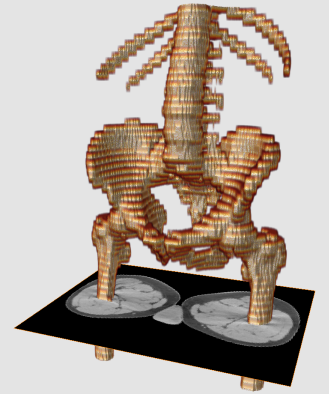 

Import surface meshes of the two scapulae provided (Scapula1 & Scapula2) using any python library of your choice (you can try __[trimesh](https://pypi.org/project/trimesh/)__ or other such)

a) Display each mesh

b) Speculate on requirements to compare the two shapes. That is, what would correspondence mean in the context of surfaces? A mesh used to represent a surface is constituted of vertices (or nodes) that are points on the surface of the object. The topology of the mesh is described by an array (often called 'faces') that describes how the vertices are connected to each other. Thus, the relationship between 'vertices' is contained in 'faces'. If two surfaces, that are in correspondence, are described by the same mesh structure then they are 'iso-topological'. The two surfaces provided here are iso-topological where the vertices are in correspondence. That is, vertex id# describes the same anatomical location on both the surfaces. How many vertices does each surface have? How many faces? How would you confirm that they are indeed iso-topological?

In [16]:
import trimesh;
mesh = trimesh.load('./Scapula1.ply')
mesh.show()

D:\Programs\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [21]:
import trimesh;
mesh1 = trimesh.load('./Scapula2.ply')
mesh1.show()

Question 3B

To compare the two images the easiest way would be to compare the distances between like parts. The mesh is made up of a series of verticies so the easiest way would be to mirror one, so that they are in the same orientation, and then compare the distances between like verticies. Anatomically we could compare the lengths of the same structures on each scapula. If we take the anatomical aproach we could compare the distance between muscle attachment areas and overall size. A similar aproach could be taken using the verticies. The verticies on each could be equated and the distances between them could be compared.

In [15]:
import trimesh;
m1 = trimesh.load('./Scapula1.ply')
m2 = trimesh.load('./Scapula2.ply')
print("Scapula 1 has ",len(m1.vertices)," vertices")
print("Scapula 2 has ",len(m2.vertices)," vertices")
c = 0

for f in m1.faces:
    c = c+1;
print("Scapula 1 has ",c," faces")
c=0
for f in m2.faces:
    c = c+1;
print("Scapula 2 has ",c," faces")


Scapula 1 has  24168  vertices
Scapula 2 has  24168  vertices
Scapula 1 has  48332  faces
Scapula 2 has  48332  faces


The images are iso-topological as they have the same number of faces and vertices.

### Question 4 [25 marks]: Shape matching

Once the concept of correspondence is established between shapes, it is possible to proceed towards large sample shape analyses. The most basic of such endeavours is the procedure of finding the "average" shape that would describe a given database. Thus, given the 2 surfaces, calculate the average of two shapes.

a) **Direct method** _(Hint: use the correspondence between the points of the surfaces (at the vertices) to calculate the average spatial position of each point on the surface)_
    
Visualize the resulting average surface. Does it look as a representative shape that would describe the 2 surfaces in our dataset? 

b) **Rigid alignment** (_Hint: think of procrustes analysis_ __[Link1](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.procrustes.html)__ __[Link2](https://en.wikipedia.org/wiki/Procrustes_analysis)__)

If the direct method was unsatisfactory, would removing pose differences between the shapes help? Can you think of other ways to improve the registration process?

Direct Method:

In [24]:
import trimesh;
m1 = trimesh.load('./Scapula1.ply')
m2 = trimesh.load('./Scapula2.ply')
m3 = m1;
for i in range (len(m1.vertices)):
    m3.vertices[i] = (m1.vertices[i]+m2.vertices[i])/2
    
m3.show()

The resulting shape is somewhat horrible and confusing. I suspect one of the scapulas need to be mirrored before the comparison as one is a left scapula and the other is a right.

Rigid alignment:

In [4]:
import trimesh;
from scipy.spatial import procrustes

m1 = trimesh.load('./Scapula1.ply')
m2 = trimesh.load('./Scapula2.ply')
mv1 = m1.vertices
mv2 = m2.vertices
mv1,mv2,M = procrustes(m1.vertices, m2.vertices)

#mv1 = (mv1+mv2)/2
for i in range (len(m2.vertices)):
#    m1.vertices[i] = (mv1[i]+mv2[i])
   m1.vertices[i] = (m1.vertices[i]+m2.vertices[i])/2 + ((mv1[i]+mv2[i])/2)
    
m1.show()


As i said previously the first thing that would improve the results is mirroring one of the scapulas before comparing them.  The images are iso-topological but inverted so mirroring them would mean the vertices match up. Corresponding features could be found without mirroring them but doing that would make it easiest to find. Finding markers on images of smaller pieces of the bone could be useful to find corresponding points. For example, markers on a seperated scapular spine could help match the corresponding markers on two seperate scapulas. Placing vertices on anatomical features could allow for registration with multiple other sources if the placement is made standard. This would allow a third scan, that has a  known orientation and structure, to be used to orientate the images seperately. After they are orientated seperately it becomes much easier to find corresponding points. The transforms would have already been applied so it just becomes a matter of matching the points and comparing.